<a href="https://colab.research.google.com/github/Shashank1112222/sml/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1g0WYRPQgeNemePje7fLEtttH4gFXSL8f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('weighloss.csv')

In [4]:
import pandas as pd
df=pd.read_csv("weighloss.csv")
df

,Age,Weight,Cycling,Running,Walking,Gym,Avg,After 1month,After 4months,After 9months,Cal in,Cal out,Change,Gender
0,22,98,1,1,1,1,1.00,96.0,89.0,73.0,2500,2650,100%,male
1,21,88,1,1,1,1,1.00,87.0,81.0,75.0,2800,2900,100%,female
2,23,86,1,1,0,0,0.50,84.0,80.0,74.0,2100,2200,50%,female
3,20,84,0,0,0,0,0.00,85.0,88.0,91.0,2600,2100,0%,male
4,52,87,1,0,1,0,0.50,86.0,81.0,73.0,2500,2600,50%,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,45,75,1,0,1,1,0.75,NaN,NaN,NaN,2100,2200,75%,male
196,25,76,0,0,1,0,0.25,NaN,NaN,NaN,2100,2000,0%,female
197,26,79,0,1,1,0,0.50,NaN,NaN,NaN,2100,2000,0%,female
198,28,91,0,0,0,0,0.00,NaN,NaN,NaN,2500,2600,0%,female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    int64  
 1   Weight         200 non-null    int64  
 2   Cycling        200 non-null    int64  
 3   Running        200 non-null    int64  
 4   Walking        200 non-null    int64  
 5   Gym            200 non-null    int64  
 6   Avg            200 non-null    float64
 7   After 1month   75 non-null     float64
 8   After 4months  75 non-null     float64
 9   After 9months  75 non-null     float64
 10  Cal in         200 non-null    int64  
 11  Cal out        200 non-null    int64  
 12  Change         200 non-null    object 
 13  Gender         200 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 22.0+ KB


In [6]:
df.describe()

,Age,Weight,Cycling,Running,Walking,Gym,Avg,After 1month,After 4months,After 9months,Cal in,Cal out
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,75.000000,75.000000,75.000000,200.000000,200.000000
mean,37.515000,87.385000,0.510000,0.470000,0.485000,0.515000,0.495000,89.066667,87.866667,86.320000,2303.300000,2253.500000
std,13.956493,7.472346,0.501154,0.500352,0.501029,0.501029,0.335279,7.183565,8.222141,11.736015,205.367938,253.889839
min,16.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,70.000000,68.000000,2000.000000,1800.000000
25%,25.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.250000,85.000000,81.000000,76.000000,2100.000000,2000.000000
50%,35.000000,87.000000,1.000000,0.000000,0.000000,1.000000,0.500000,87.000000,88.000000,87.000000,2200.000000,2200.000000
75%,51.000000,93.250000,1.000000,1.000000,1.000000,1.000000,0.750000,96.000000,93.000000,94.500000,2500.000000,2500.000000
max,77.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,104.000000,105.000000,110.000000,2800.000000,2900.000000


In [7]:
df.sample()

,Age,Weight,Cycling,Running,Walking,Gym,Avg,After 1month,After 4months,After 9months,Cal in,Cal out,Change,Gender
46,19,96,1,0,0,0,0.25,95.0,91.0,87.0,2150,2250,25%,male


In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

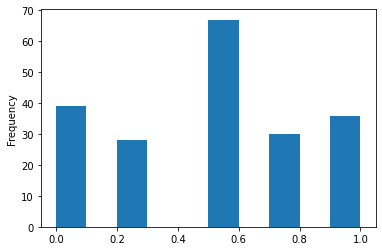

In [10]:
df.Avg.plot.hist()

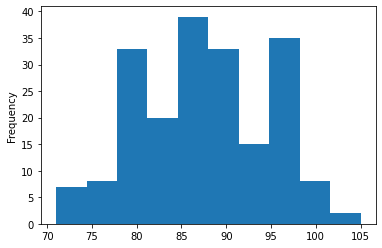

In [12]:
df.Weight.plot.hist()

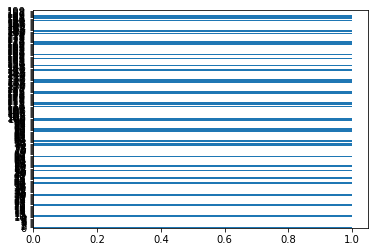

In [15]:
df.Cycling.plot.barh()

In [16]:
df=df.rename({'Cal in':'Intake','Cal out':'Out'},axis=1)
df=df.rename({'After 1month':'1month','After 9months':'9months','After 4months':'4months'},axis=1)

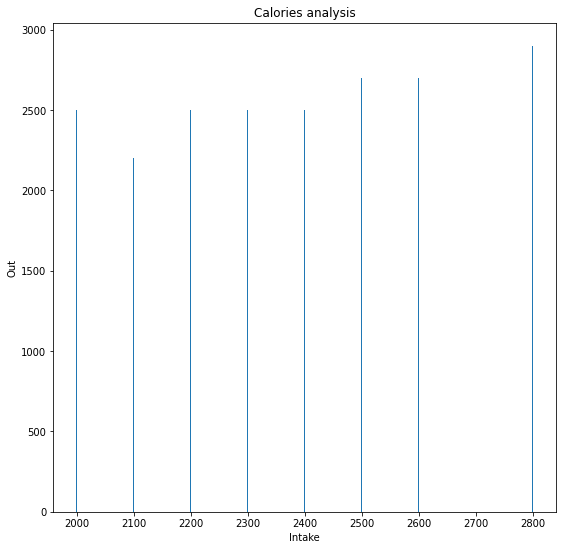

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.title('Calories analysis')
plt.xlabel("Intake")
plt.ylabel("Out")
plt.bar(df.Intake,df.Out)
plt.show()

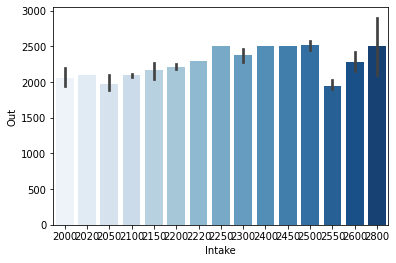

<Figure size 648x648 with 0 Axes>

In [20]:
import seaborn as sns
sns.barplot(x='Intake',y='Out',data=df,palette="Blues")
plt.figure(figsize=(9,9))


plt.show()

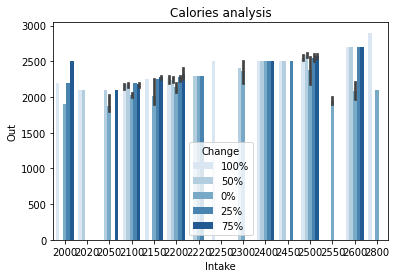

In [21]:
sns.barplot(x='Intake',y='Out',hue='Change',data=df,palette="Blues")
plt.title('Calories analysis')
plt.xlabel("Intake")
plt.ylabel("Out")
plt.show()

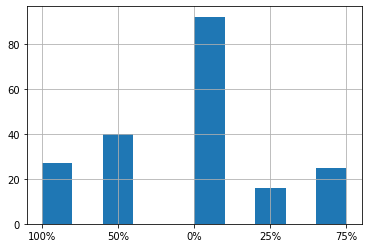

In [22]:
df.Change.hist()

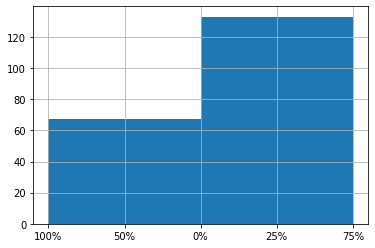

In [23]:
df.Change.hist(bins=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa5507b750>,
      dtype=object)

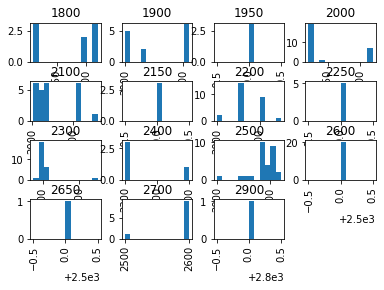

In [24]:
df.hist(column='Intake',by="Out",bins =12)

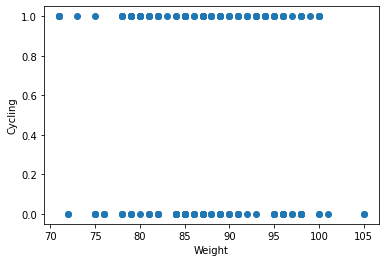

In [25]:
plt.xlabel("Weight")
plt.ylabel("Cycling")
plt.scatter(df.Weight,df.Cycling)
plt.show()

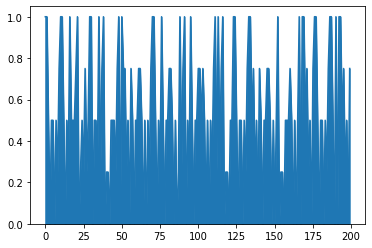

In [26]:
df.Avg.plot.area()

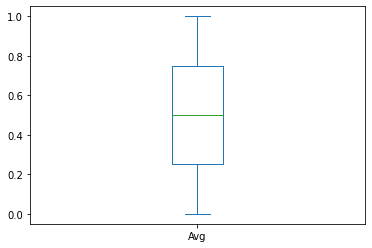

In [27]:
df.Avg.plot.box()

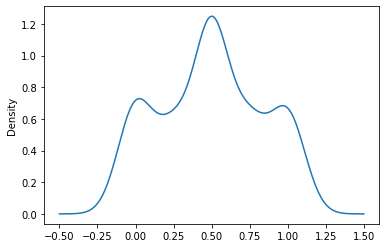

In [28]:
df.Avg.plot.density()

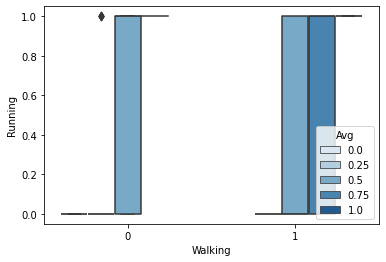

In [29]:
sns.boxenplot(x='Walking',y='Running',hue='Avg',data=df,palette="Blues")

plt.xlabel("Walking")
plt.ylabel("Running")
plt.show()

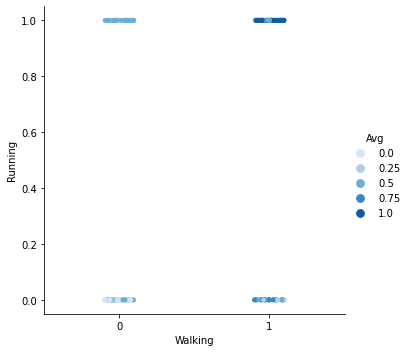

In [30]:
sns.catplot(x='Walking',y='Running',hue='Avg',data=df,palette="Blues")

plt.xlabel("Walking")
plt.ylabel("Running")
plt.show()


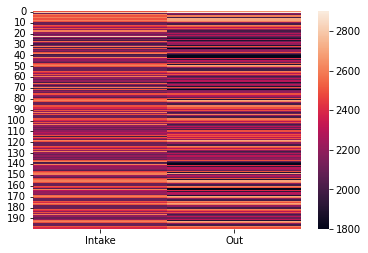

In [31]:
sns.heatmap(df[['Intake','Out']])

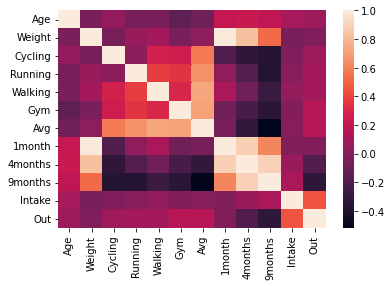

In [32]:
sns.heatmap(df.corr())

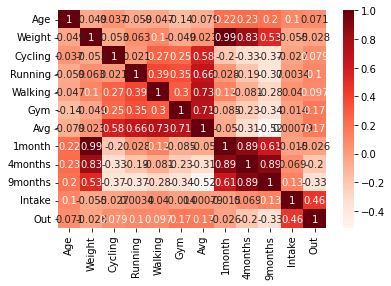

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='Reds')

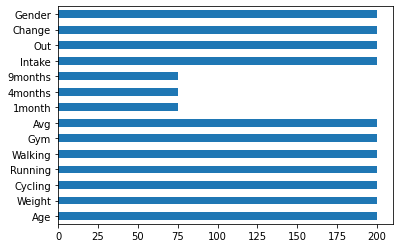

In [34]:
df.count().plot.barh()

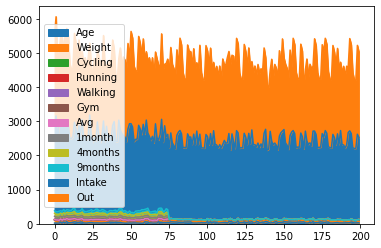

In [35]:
df.plot.area()

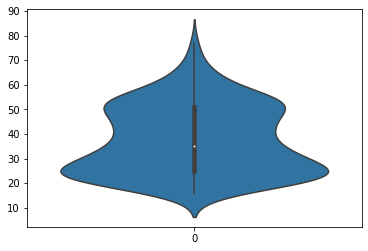

In [36]:
sns.violinplot(data=df.Age)

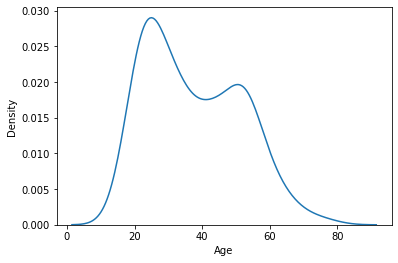

In [37]:
sns.kdeplot(data=df.Age)

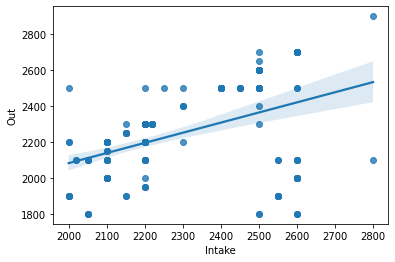

In [38]:
sns.regplot(x=df.Intake,y=df.Out)

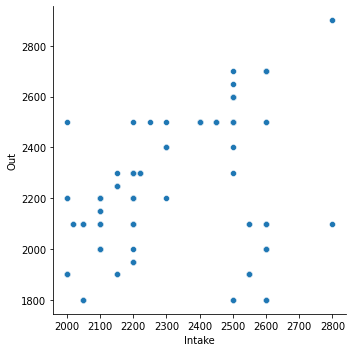

In [39]:
sns.relplot(x=df.Intake,y=df.Out)

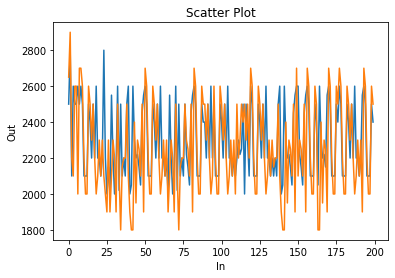

In [40]:
plt.plot(df['Intake'])
plt.plot(df['Out'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('In')
plt.ylabel('Out')
 
plt.show()

In [41]:

import plotly.express as px
fig = px.line(df, y='Age', color='Gender')
 
# showing the plot
fig.show()

In [42]:
fig = px.bar(df, x='Intake', y='Out', color='Avg')
 
# showing the plot
fig.show()

In [43]:
fig = px.histogram(df, x='Avg', color='Gender')
 
# showing the plot
fig.show()

In [84]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()

In [44]:
import plotly.graph_objects as px


# reading the database


plot = px.Figure(data=[px.Scatter(
	y=df['Avg'],
	mode='lines',)
])

plot.update_layout(
	xaxis=dict(
		rangeselector=dict(
			buttons=list([
				dict(count=1,
					step="day",
					stepmode="backward"),
			])
		),
		rangeslider=dict(
			visible=True
		),
	)
)

plot.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



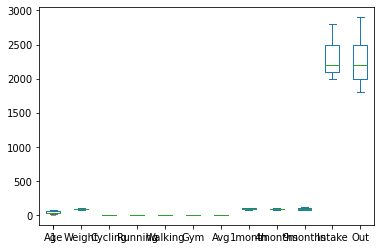

In [45]:
df.plot.box()
  
# individual attribute box plot
plt.boxplot(df['Avg'])
plt.show()

In [85]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [52]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [60]:
df.head

<bound method NDFrame.head of      Age  Weight  Cycling  Running  Walking  Gym   Avg  1month  4months  \
0     22      98        1        1        1    1  1.00    96.0     89.0   
1     21      88        1        1        1    1  1.00    87.0     81.0   
2     23      86        1        1        0    0  0.50    84.0     80.0   
3     20      84        0        0        0    0  0.00    85.0     88.0   
4     52      87        1        0        1    0  0.50    86.0     81.0   
..   ...     ...      ...      ...      ...  ...   ...     ...      ...   
195   45      75        1        0        1    1  0.75     NaN      NaN   
196   25      76        0        0        1    0  0.25     NaN      NaN   
197   26      79        0        1        1    0  0.50     NaN      NaN   
198   28      91        0        0        0    0  0.00     NaN      NaN   
199   30      92        1        0        1    1  0.75     NaN      NaN   

     9months  Intake   Out  Change  Gender  
0       73.0    2500  26

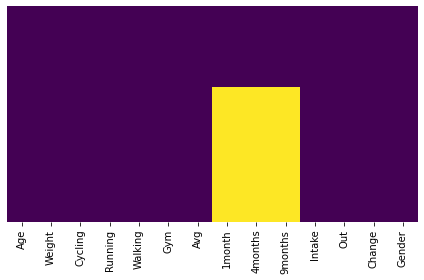

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [62]:
df = df.dropna()
df.head()

,Age,Weight,Cycling,Running,Walking,Gym,Avg,1month,4months,9months,Intake,Out,Change,Gender
0,22,98,1,1,1,1,1.0,96.0,89.0,73.0,2500,2650,1,male
1,21,88,1,1,1,1,1.0,87.0,81.0,75.0,2800,2900,1,female
2,23,86,1,1,0,0,0.5,84.0,80.0,74.0,2100,2200,3,female
3,20,84,0,0,0,0,0.0,85.0,88.0,91.0,2600,2100,0,male
4,52,87,1,0,1,0,0.5,86.0,81.0,73.0,2500,2600,3,male


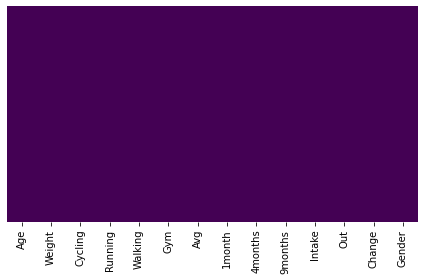

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [64]:

from sklearn import preprocessing
LE= preprocessing.LabelEncoder()
df.Change = LE.fit_transform(df.Change)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Weight,Cycling,Running,Walking,Gym,Avg,1month,4months,9months,Intake,Out,Change,Gender
0,22,98,1,1,1,1,1.0,96.0,89.0,73.0,2500,2650,1,male
1,21,88,1,1,1,1,1.0,87.0,81.0,75.0,2800,2900,1,female
2,23,86,1,1,0,0,0.5,84.0,80.0,74.0,2100,2200,3,female
3,20,84,0,0,0,0,0.0,85.0,88.0,91.0,2600,2100,0,male
4,52,87,1,0,1,0,0.5,86.0,81.0,73.0,2500,2600,3,male


In [65]:
df = df.drop('Age',axis=1)
df = df.drop('Weight',axis=1)
df = df.drop('Cycling',axis=1)
df = df.drop('Running',axis=1)
df = df.drop('Gym',axis=1)
df = df.drop('1month',axis=1)
df = df.drop('4months',axis=1)
df = df.drop('9months',axis=1)
df = df.drop('Gender',axis=1)

In [67]:
df = df.drop('Walking',axis=1)

In [68]:
df.head()

,Avg,Intake,Out,Change
0,1.0,2500,2650,1
1,1.0,2800,2900,1
2,0.5,2100,2200,3
3,0.0,2600,2100,0
4,0.5,2500,2600,3


In [69]:
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [70]:
data_scaled.head()

,0,1,2
0,1.503288,0.889901,1.647825
1,1.503288,2.239144,2.616375
2,-0.010089,-0.909090,-0.095564
3,-1.523466,1.339649,-0.482983
4,-0.010089,0.889901,1.454115


In [71]:
data_scaled.columns=['Avg','Intake','Out']
data_scaled.head()

,Avg,Intake,Out
0,1.503288,0.889901,1.647825
1,1.503288,2.239144,2.616375
2,-0.010089,-0.909090,-0.095564
3,-1.523466,1.339649,-0.482983
4,-0.010089,0.889901,1.454115


In [72]:
data_scaled['Class'] = df.Change
data_scaled.head()

,Avg,Intake,Out,Class
0,1.503288,0.889901,1.647825,1
1,1.503288,2.239144,2.616375,1
2,-0.010089,-0.909090,-0.095564,3
3,-1.523466,1.339649,-0.482983,0
4,-0.010089,0.889901,1.454115,3


In [73]:
data_scaled = data_scaled[data_scaled['Class'].notna()]
import numpy as np
x=np.array(data_scaled[['Avg','Intake','Out']])
y=np.array(data_scaled[['Class']])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)
x_train

array([[-0.7667776 , -1.35883801, -1.25782277],
       [ 0.74659924, -0.68421632, -1.25782277],
       [-0.7667776 , -0.90909022, -0.87040303],
       [-0.01008918, -0.90909022, -0.87040303],
       [-1.52346601,  0.88990098,  1.45411544],
       [-0.7667776 ,  2.23914437, -0.48298328],
       [-0.01008918,  1.33964877,  1.0666957 ],
       [ 0.74659924, -0.45934242, -0.48298328],
       [-1.52346601, -0.90909022, -0.28927341],
       [-0.01008918,  0.88990098,  1.45411544],
       [ 1.50328766, -0.90909022, -0.87040303],
       [-0.01008918, -0.45934242,  0.29185621],
       [-1.52346601,  0.88990098,  1.45411544],
       [-0.01008918, -0.45934242,  0.29185621],
       [ 0.74659924, -0.90909022, -0.09556354],
       [ 1.50328766, -0.90909022, -0.28927341],
       [-0.7667776 ,  0.88990098, -1.64524252],
       [-0.01008918, -0.90909022, -0.48298328],
       [-0.7667776 , -1.35883801, -1.25782277],
       [-0.01008918, -0.00959462,  0.67927595],
       [-1.52346601,  1.11477488, -1.257

In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [75]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [76]:
import numpy as np
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 2]
 [1 1]
 [3 3]
 [3 2]
 [0 0]
 [1 1]
 [1 1]]


In [77]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.8208955223880597
Training accuracy: 82.08955223880598


In [78]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.75
Testing accuracy: 75.0


In [79]:
accuracy=model.score(x,y)*100
print(accuracy)

81.33333333333333


In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[2 0 0 0]
 [0 3 0 0]
 [1 0 0 1]
 [0 0 0 1]]


0.75